### Guided Practice: Logit Function and Odds

In [1]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [20]:
lm = LogisticRegression() # model initialization

df = pd.read_csv('../dataset/collegeadmissions.csv')

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df = df.join(pd.get_dummies(df['rank'], prefix = 'rank')) # convert to dummy variables
# temp_df = pd.get_dummies
# df.join(temp)

In [6]:
df.head()

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [7]:
X = df[['gre', 'gpa', 'rank_1', 'rank_2', 'rank_3']]
Y = df['admit']

In [8]:
lm.fit(X, Y)
# df['admit'] = outcome variable

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
import numpy as np

In [10]:
print lm.coef_
print lm.intercept_
print df.admit.mean()
print np.exp(lm.coef_) # e power of every value in the array

[[  1.63913356e-03   4.33355414e-04   1.15220976e+00   5.14395668e-01
   -3.62326166e-02]]
[-2.09315184]
0.3175
[[ 1.00164048  1.00043345  3.16517946  1.67262737  0.96441593]]


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

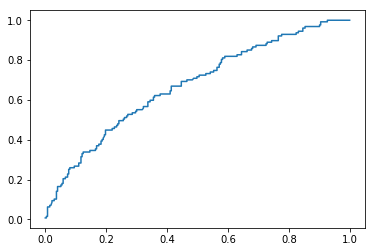

In [16]:
feature_set = df[['gre','gpa', 'rank_1', 'rank_2', 'rank_3']]
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

In [17]:
probas
# col 1 is the probability of outcome 0, col 2 is for outcome 1

array([[ 0.81831149,  0.18168851],
       [ 0.73999949,  0.26000051],
       [ 0.40803412,  0.59196588],
       [ 0.73937525,  0.26062475],
       [ 0.77548266,  0.22451734],
       [ 0.58217651,  0.41782349],
       [ 0.50543376,  0.49456624],
       [ 0.71540221,  0.28459779],
       [ 0.77604811,  0.22395189],
       [ 0.60579341,  0.39420659],
       [ 0.68570416,  0.31429584],
       [ 0.55436619,  0.44563381],
       [ 0.42396126,  0.57603874],
       [ 0.60588034,  0.39411966],
       [ 0.44814096,  0.55185904],
       [ 0.79267236,  0.20732764],
       [ 0.6927379 ,  0.3072621 ],
       [ 0.82320101,  0.17679899],
       [ 0.56606748,  0.43393252],
       [ 0.51353641,  0.48646359],
       [ 0.78725265,  0.21274735],
       [ 0.62136711,  0.37863289],
       [ 0.75183996,  0.24816004],
       [ 0.72654406,  0.27345594],
       [ 0.58213961,  0.41786039],
       [ 0.40806971,  0.59193029],
       [ 0.48078818,  0.51921182],
       [ 0.77542153,  0.22457847],
       [ 0.57415809,

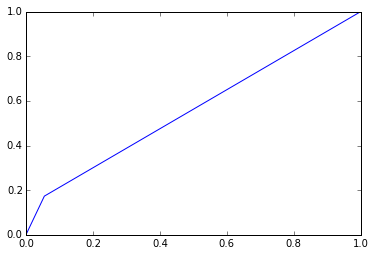

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [19]:
lm = LogisticRegression() # model initialization

df2 = pd.read_csv('../dataset/titanic.csv')

In [21]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df2.describe()
df2.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [31]:
# counts for each outcome class label
df2.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
# select the columns I need
cols = ['Survived', 'Pclass','Sex','Age','SibSp','Parch']
model_data = df2[cols].copy()

In [47]:
# check where are the missing values
print len(model_data) # total num of rows/obs
print model_data.isnull().sum() # num of null rows

891
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64


In [45]:
# since the missing value number is relatively huge, let's fill them out
# use fillna
model_data.Age = model_data.Age.fillna(method='bfill')

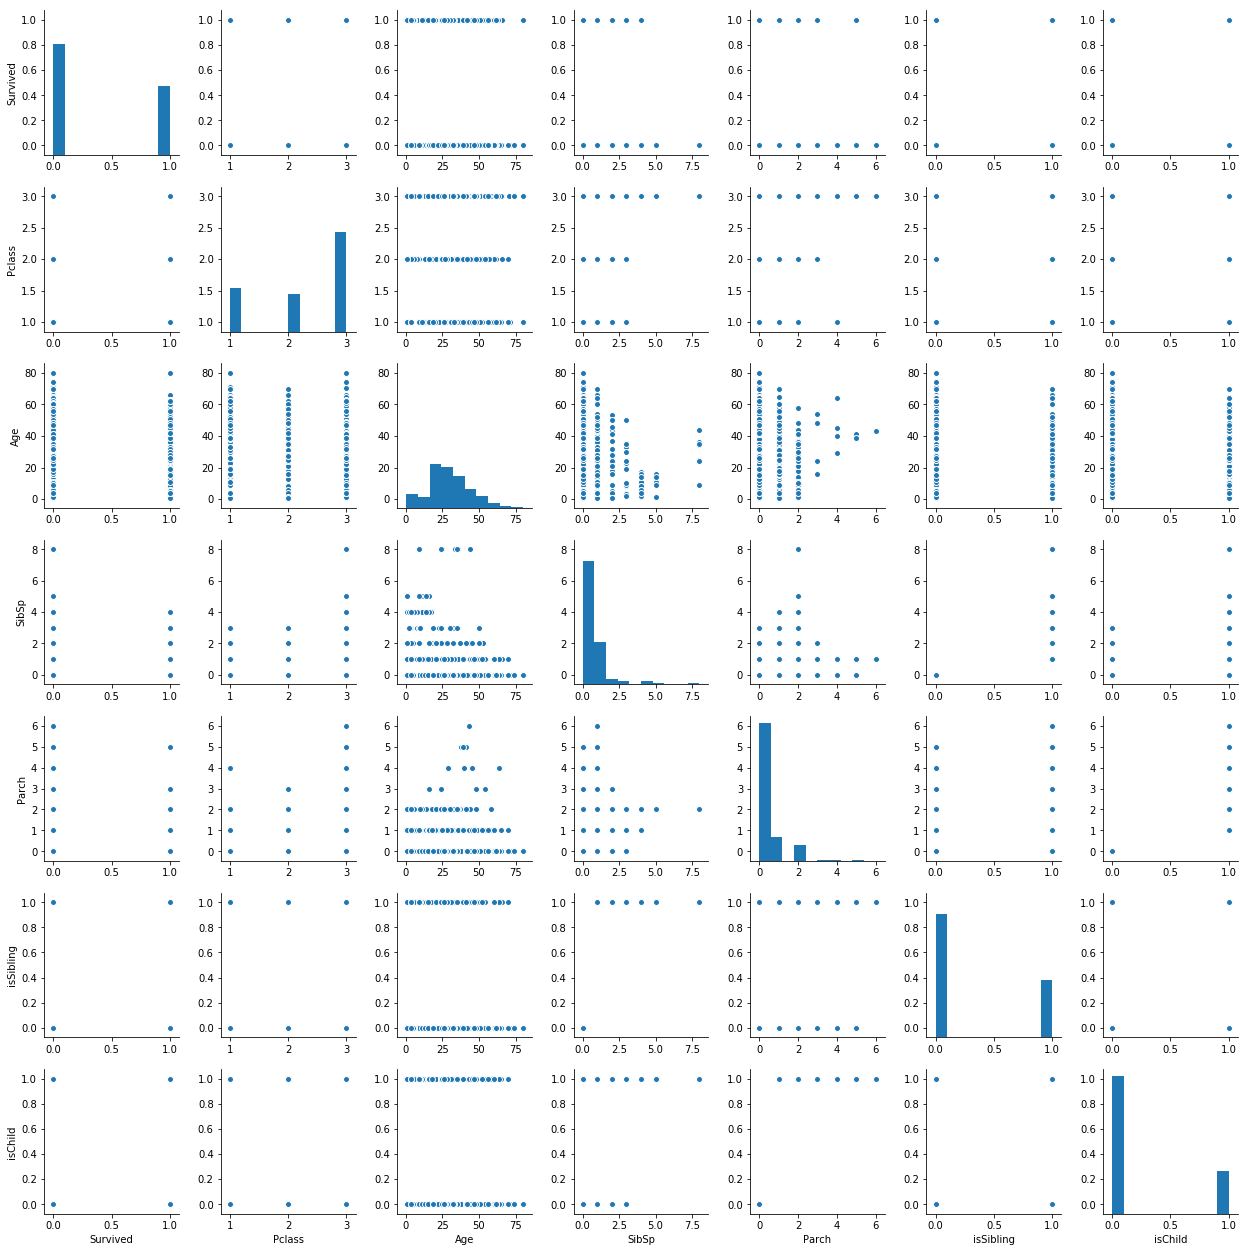

In [55]:
# initial EDA: visualization
%matplotlib inline
import seaborn as sns
sns.pairplot(model_data)

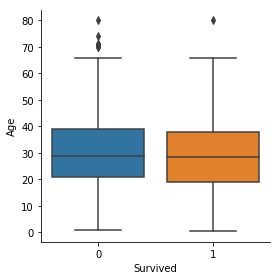

In [49]:
# plot to see the relation between age and outcome variable
sns.factorplot(kind = 'box', data = model_data, x='Survived', y = 'Age')
# nothing much

In [62]:
# because there are 6 values for some columns, let's roll them up to be present or non-present
model_data['isSibling'] = model_data.SibSp.apply(lambda x:int(x > 0)) # int(x>0) can be dropped, outcome would be T/F
model_data['isChild'] = model_data.Parch.apply(lambda x:int(x > 0))
# For Sex & Pclass col, let's convert it into binary values from text
model_data = pd.get_dummies(data = model_data, columns = ['Sex','Pclass'], drop_first = True)
# if [[]] after "columns" above, it means the outcome will be another df

In [63]:
model_data.head()

,Survived,Age,SibSp,Parch,isSibling,isChild,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,0,1
3,1,35.0,1,0,1,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1


In [ ]:
#################### YOU WOULD STILL WANT TO DO CROSS-VALIDATION FOR THIS CLASSIFICATION MODEL #############################

In [64]:
# set X, Y colums
X = model_data[['Age', 'isSibling', 'isChild', 'Sex_male', 'Pclass_2','Pclass_3']]
Y = model_data['Survived']

In [72]:
lm = LogisticRegression(C=1e20) # model initialization

# C value is the penalty being added for regularization

In [73]:
lm.fit(X, Y)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
print np.exp(lm.coef_)
# O0 -> np.exp(lm.coef_) * O0
# if the output is greater than 1, then the odds become greater

[[ 0.9731953   0.8748615   0.95653671  0.06963845  0.34044605  0.10433397]]


In [75]:
# Scoring metric 1: accuracy of the model
print lm.score(X, Y)

0.784511784512


In [76]:
# Scoring metric 2: TPR & FPR
probas = lm.predict_proba(X)
roc_auc_score(Y, probas[:,1]) # it's "1" because we only care about the 1 outcome = Survived
# We can still use the coefs to identify which variable has the biggest impact on outcome variable

0.84689334142886052